# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import shutil

# Source folder path in Google Drive
source_folder = '/content/drive/My Drive/data'

# Destination folder path in Colab environment
destination_folder = '/content/data'

# Copy the folder
shutil.copytree(source_folder, destination_folder)

Mounted at /content/drive


'/content/data'

**Q.1** Import all required modules

In [4]:
#Your code here
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import Rescaling
import tensorflow as tf

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [5]:

data= tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    labels='inferred',
    label_mode='int',
    class_names=['Cheetah', 'Crocodile', 'Elephants', 'Tiger'],
    color_mode='rgb',
    batch_size=46,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    interpolation='bilinear',
)

Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [6]:
data_iterator=data.as_numpy_iterator()

In [7]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

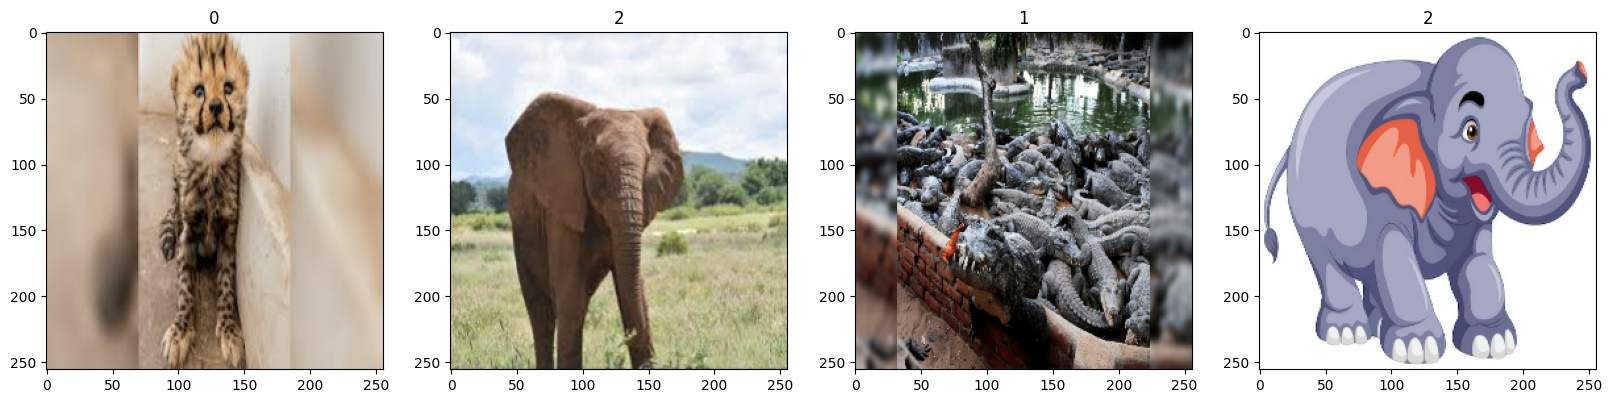

In [8]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [9]:
#Cheetah - 0
#Crocodile - 1
#Elephant - 2
#Tiger - 3

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [10]:
data = data.map(lambda x, y: (Rescaling(1./255)(x), y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [13]:
#Your code here
train_size = int(len(data)*0.9)
test_size = int(len(data)*0.1)

train_data = data.take(train_size)
test_data = data.skip(train_size).take(test_size)

def to_categorical(x, y):
    y_one_hot = tf.one_hot(y, depth=4)
    return x, y_one_hot

train_data = train_data.map(to_categorical)
test_data = test_data.map(to_categorical)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [14]:
#Write code to create CNN model including fully connected layers with softmax as final layer
model= Sequential()

model.add(Conv2D(32,(3,3), strides = 1, padding = 'same', input_shape = (256,256,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation = 'softmax'))

**Q.6** Compile your model

In [15]:
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [22]:
model.fit(train_data, epochs = 30)  # this is actually 70 epochs because i did 10 epochs, then i did 30, then 30 again.

Epoch 1/30
33/33 [==============================] - 15s 344ms/step - loss: 0.3916 - accuracy: 0.9045
Epoch 2/30
33/33 [==============================] - 14s 352ms/step - loss: 0.3377 - accuracy: 0.9196
Epoch 3/30
33/33 [==============================] - 14s 344ms/step - loss: 0.5021 - accuracy: 0.8933
Epoch 4/30
33/33 [==============================] - 14s 317ms/step - loss: 0.2954 - accuracy: 0.9289
Epoch 5/30
33/33 [==============================] - 14s 337ms/step - loss: 0.3295 - accuracy: 0.9157
Epoch 6/30
33/33 [==============================] - 13s 323ms/step - loss: 0.2331 - accuracy: 0.9368
Epoch 7/30
33/33 [==============================] - 13s 316ms/step - loss: 0.2405 - accuracy: 0.9381
Epoch 8/30
33/33 [==============================] - 14s 349ms/step - loss: 0.1971 - accuracy: 0.9513
Epoch 9/30
33/33 [==============================] - 13s 330ms/step - loss: 0.3357 - accuracy: 0.9209
Epoch 10/30
33/33 [==============================] - 14s 331ms/step - loss: 0.3432 - accura

**Q.8** Test your code with test set

In [23]:
loss,accuracy=model.evaluate(test_data)

3/3 [==============================] - 10s 69ms/step - loss: 0.0241 - accuracy: 0.9928


In [24]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Congratulations, CNN assignment complete!!


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increase the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than its a easy task, happy learning!!**